# **Handling Imbalanced Dataset**

- Handling imbalanced datasets in machine learning involves various techniques aimed at mitigating the effects of class imbalance, where one class is significantly more prevalent than the others.
- Imbalanced datasets can lead to biased models that perform poorly on minority classes, as they tend to focus more on the majority class due to its dominance in the data.

**Techniques of handling imbalanced datasets**
- 1) Upsampling (or Oversampling)
- 2) Downsampling (or Undersampling)
- 3) SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#set the random seed for lock the randomness
np.random.seed(47)

#create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)  #value(0) = 900
n_class_1 = n_samples - n_class_0           #value(1) = 100

In [ ]:
n_class_0, n_class_1

(900, 100)

In [ ]:
class_0 = pd.DataFrame({
    "feature_1" : np.random.normal(loc = 0, scale = 1, size = n_class_0),
    "feature_2" : np.random.normal(loc = 0, scale = 1, size = n_class_0),
    "target" : [0] * n_class_0
})

class_1 = pd.DataFrame({
    "feature_1" : np.random.normal(loc = 2, scale = 1, size = n_class_1),
    "feature_2" : np.random.normal(loc = 2, scale = 1, size = n_class_1),
    "target" : [1] * n_class_1
})

In [ ]:
df = pd.concat([class_0, class_1]).reset_index(drop  = True)

In [ ]:
df.head()

,feature_1,feature_2,target
0,-0.848009,-0.802302,0
1,1.305906,-0.392160,0
2,0.924208,0.384541,0
3,0.640412,0.107032,0
4,-1.054737,0.932132,0


In [ ]:
df["target"].value_counts()

0    900
1    100
Name: target, dtype: int64

### **1) Upsampling (or Oversampling)**
- Upsampling involves randomly duplicating examples from the minority class (the class with fewer samples) until the class distribution is balanced or closer to being balanced.
- This is typically done by randomly sampling with replacement from the minority class until it has the same number of samples as the majority class.
- The goal of upsampling is to provide the minority class with more representation in the dataset, allowing the model to learn from these examples more effectively.

In [ ]:
df_minority = df[df["target"] == 1]
df_majority = df[df["target"] == 0]

In [ ]:
df_minority.head()

,feature_1,feature_2,target
900,1.898397,1.784738,1
901,1.338404,0.510308,1
902,1.721692,2.818354,1
903,1.510546,2.210832,1
904,4.511716,1.675015,1


In [ ]:
df_majority.head()

,feature_1,feature_2,target
0,-0.848009,-0.802302,0
1,1.305906,-0.392160,0
2,0.924208,0.384541,0
3,0.640412,0.107032,0
4,-1.054737,0.932132,0


In [ ]:
df_minority.shape

(100, 3)

In [ ]:
df_majority.shape

(900, 3)

In [ ]:
#Performing upsampling with help of sklearn library
from sklearn.utils import resample

In [ ]:
#upscaling the dataset of minority class from 100 --> 900
df_minority_upsample = resample(df_minority,
                                replace = True, #sample with replacement
                                n_samples = len(df_majority), #to match the majority class
                                random_state = 47  #Determines random number generation for shuffling the data.
                                )

In [ ]:
df_minority_upsample.shape

(900, 3)

In [ ]:
df_minority.shape

(100, 3)

- it immensly show that the sample data is increase from 100 --> 900

In [ ]:
df_minority_upsample.target.value_counts()

1    900
Name: target, dtype: int64

In [ ]:
df_upsample = pd.concat([df_majority, df_minority_upsample])

In [ ]:
df_upsample.head()

,feature_1,feature_2,target
0,-0.848009,-0.802302,0
1,1.305906,-0.392160,0
2,0.924208,0.384541,0
3,0.640412,0.107032,0
4,-1.054737,0.932132,0


In [ ]:
df_upsample.shape

(1800, 3)

In [ ]:
df_upsample["target"].value_counts()

0    900
1    900
Name: target, dtype: int64

- Here, the value of 0 and 1 are same which show that we moved the above data from dump data to useful data with help of upscaling technique.

## 2) **Downsampling (or Undersampling)**

- Downsampling involves randomly removing examples from the majority class (the class with more samples) until the class distribution is balanced or closer to being balanced.
- This is typically done by randomly selecting examples from the majority class without replacement until it has the same number of samples as the minority class.
- The goal of downsampling is to reduce the dominance of the majority class in the dataset, thereby preventing the model from being biased towards predicting the majority class.

In [ ]:
class_0 = pd.DataFrame({
    "feature_1" : np.random.normal(loc = 0, scale = 1, size = n_class_0),
    "feature_2" : np.random.normal(loc = 0, scale = 1, size = n_class_0),
    "target" : [0] * n_class_0
})

class_1 = pd.DataFrame({
    "feature_1" : np.random.normal(loc = 2, scale = 1, size = n_class_1),
    "feature_2" : np.random.normal(loc = 2, scale = 1, size = n_class_1),
    "target" : [1] * n_class_1
})

In [ ]:
df = pd.concat([class_0, class_1]).reset_index(drop = True)

In [ ]:
df_minority = df[df["target"] == 1]
df_majority = df[df["target"] == 0]

In [ ]:
#downsampling the dataset of majority class from 900 --> 100
df_majority_downsample = resample(df_majority,
                                  replace = False, #sample with replacement
                                  n_samples = len(df_minority),#to match the minority class
                                  random_state = 47)#Determines random number generation for shuffling the data.

In [ ]:
df_majority_downsample.shape

(100, 3)

In [ ]:
df_minority.shape

(100, 3)

- it immensly show that the sample data is increase from 100 --> 900

In [ ]:
df = pd.concat([df_minority, df_majority_downsample])

In [ ]:
df["target"].value_counts()

1    100
0    100
Name: target, dtype: int64

- Here, the value of 0 and 1 are same which show that we moved the above data from dump data to useful data with help of downscaling technique.

## **3) SMOTE(Synthetic Minority Oversampling Technique)**

- It is technique used to address the imbalanced dataset where the minority classes has significantly fewer instances than the majority of classes.
- SMOTE stands for Synthetic Minority Over-sampling Technique. It is a popular technique used to address the class imbalance problem in machine learning by generating synthetic examples of the minority class.

In [ ]:
#importing the dataset library from sklearn
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples = 1000, #total sample datapoints
                           n_features = 2,  #features in dataset
                           n_redundant = 0, #no of redundant featues (for relationship)
                           n_clusters_per_class = 1, #group/cluster per class
                           weights = [0.90], #want one category is 90%
                           random_state = 47)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X, y

(array([[-1.49969458, -0.32983982],
        [-0.42500606, -2.72210897],
        [-0.85010568,  0.57696968],
        ...,
        [-0.55161987, -2.75300432],
        [-0.67321515, -1.49082107],
        [-1.26751404, -1.06954218]]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [ ]:
df1 = pd.DataFrame(X, columns = ["f1", "f2"])
df2 = pd.DataFrame(y, columns = ["target"])
final_df = pd.concat([df1, df2], axis = 1)

In [ ]:
final_df.head()

,f1,f2,target
0,-1.499695,-0.329840,0
1,-0.425006,-2.722109,0
2,-0.850106,0.576970,1
3,-1.146545,-0.812428,0
4,-0.631728,-1.372679,0


In [ ]:
final_df["target"].value_counts()

0    897
1    103
Name: target, dtype: int64

In [ ]:
final_df["f1"].value_counts()

-1.499695    1
-1.217596    1
-0.756142    1
-1.261096    1
-0.958464    1
            ..
-0.993977    1
-0.423160    1
-1.480010    1
-1.096510    1
-1.267514    1
Name: f1, Length: 1000, dtype: int64

In [ ]:
final_df["f2"].value_counts()

-0.329840    1
-0.548338    1
-1.407978    1
-0.569963    1
-1.463679    1
            ..
-1.184052    1
 0.457806    1
 0.110401    1
-1.143762    1
-1.069542    1
Name: f2, Length: 1000, dtype: int64

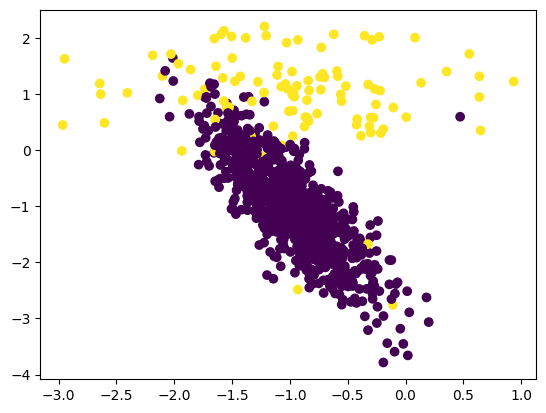

In [ ]:
plt.scatter(final_df["f1"], final_df["f2"], c = final_df["target"])

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(final_df[["f1", "f2"]], final_df["target"])

In [ ]:
X.shape, y.shape

((1794, 2), (1794,))

In [ ]:
len(y[y == 0]), len(y[y == 1])

(897, 897)

In [ ]:
len(X["f1"] == 0), len(X["f2"] == 1)

(1794, 1794)

In [ ]:
df1 = pd.DataFrame(X, columns = ["f1","f2"])
df2 = pd.DataFrame(y, columns = ["target"])
oversample_df = pd.concat([df1, df2], axis = 1)

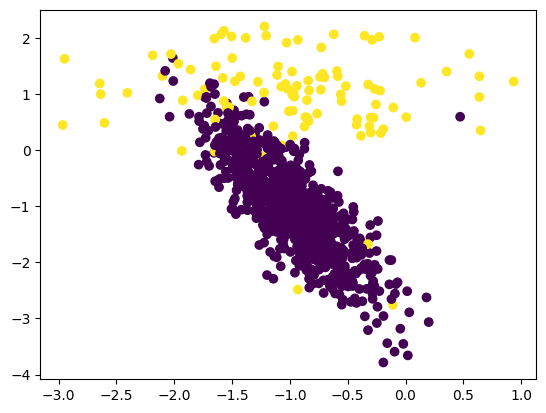

In [ ]:
#before applying SMOTE
plt.scatter(final_df["f1"], final_df["f2"], c = final_df["target"])
plt.show()

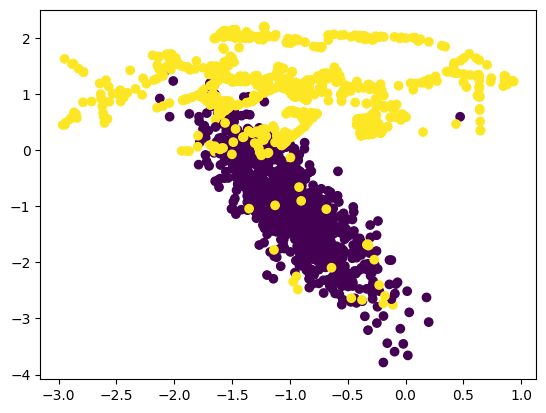

In [ ]:
#After applying SMOTE
plt.scatter(oversample_df["f1"], oversample_df["f2"], c = oversample_df["target"])
plt.show()